In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pprint import pprint

In [2]:
import pyplotdesigner as ppd

# example using simple constraints

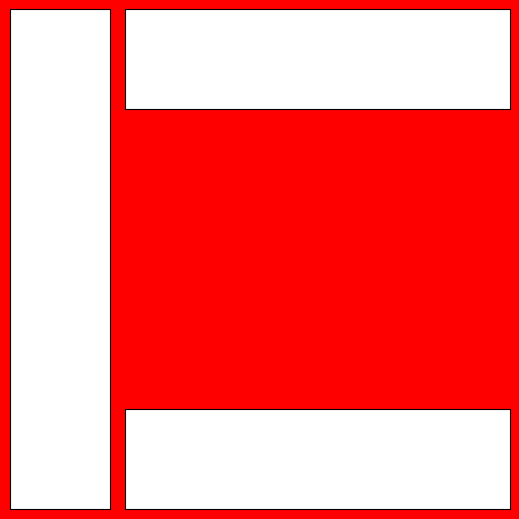

In [3]:
axis_spacing = 0.15
margin = 0.5

pd = ppd.PlotDescription(6, 6)

# add three axes
ax1 = pd.add_axis(0, 0, 1, 1)
ax2 = pd.add_axis(0, 0, 1, 1)
ax3 = pd.add_axis(0, 0, 1, 1)

# align left plot
pd.add_constraint(None, ax1, 'w', 'w', 'move separation', margin)

# align to north boundary
pd.add_constraint(None, [ax1, ax2], 'n', 'n', 'move separation', -margin)

# set margins
pd.add_constraint(ax1, [ax2, ax3], 'e', 'w', 'move separation', axis_spacing)

# resize remaining degrees of freedom to respect desired separations
pd.add_constraint(None, [ax1, ax3], 's', 's', 'resize separation', margin)
pd.add_constraint(None, [ax2, ax3], 'e', 'e', 'resize separation', -margin)

# force two right plots to obey given aspect ratio in heights
pd.add_constraint(ax2, ax3, 'w', 'w', 'resize duplicate', 1.)

# apply constraints and make image of layout
pd.apply_constraints(iterations=101)
fig = pd.get_matplotlib_figure(facecolor='r')
fig.savefig('direct-simple.png')

In [4]:
print(pd)
print('\nAxes:')
pprint(pd.axes)
print('\nConstraints:')
pprint(pd.constraints)

PlotDescription<6x6, 3 axes, 0 text elements>

Axes:
[PlotAxis<axis_0, x0=0.5, y0=0.5, w=1, h=5.0>,
 PlotAxis<axis_1, x0=1.65, y0=4.5, w=3.85, h=1>,
 PlotAxis<axis_2, x0=1.65, y0=0.5, w=3.85, h=1.0>]

Constraints:
[PlotConstraint<None.w m s:0.5 axis_0.w>,
 PlotConstraint<None.n m s:-0.5 axis_0.n>,
 PlotConstraint<None.n m s:-0.5 axis_1.n>,
 PlotConstraint<axis_0.e m s:0.15 axis_1.w>,
 PlotConstraint<axis_0.e m s:0.15 axis_2.w>,
 PlotConstraint<None.s r s:0.5 axis_0.s>,
 PlotConstraint<None.s r s:0.5 axis_2.s>,
 PlotConstraint<None.e r s:-0.5 axis_1.e>,
 PlotConstraint<None.e r s:-0.5 axis_2.e>,
 PlotConstraint<axis_1.w r d:1.0 axis_2.w>]


# example of instruction set that changes with iteration count

PlotDescription<6x6, 3 axes, 0 text elements>

Axes:
[PlotAxis<axis_0, x0=0.5, y0=0.5, w=1, h=5.0>,
 PlotAxis<axis_1, x0=1.65, y0=2.5, w=3.85, h=3.0>,
 PlotAxis<axis_2, x0=1.65, y0=0.5, w=3.85, h=1.0>]

Constraints:
[PlotConstraint<None.w m s:0.5 axis_0.w>,
 PlotConstraint<None.n m s:-0.5 axis_0.n>,
 PlotConstraint<None.n m s:-0.5 axis_1.n>,
 PlotConstraint<axis_0.e m s:0.15 axis_1.w>,
 PlotConstraint<axis_0.e m s:0.15 axis_2.w>,
 PlotConstraint<None.s r s:0.5 axis_0.s>,
 PlotConstraint<None.s r s:0.5 axis_2.s>,
 PlotConstraint<None.e r s:-0.5 axis_1.e>,
 PlotConstraint<None.e r s:-0.5 axis_2.e>,
 PlotConstraint<axis_1.w r d:1.0 axis_2.w>,
 PlotConstraint<axis_2.n r s:1.0 axis_1.s>]

PlotDescription<6x6, 3 axes, 0 text elements>

Axes:
[PlotAxis<axis_0, x0=0.5, y0=0.5, w=1, h=5.0>,
 PlotAxis<axis_1, x0=1.65, y0=4.5, w=3.85, h=1.0>,
 PlotAxis<axis_2, x0=1.65, y0=0.5, w=3.85, h=3.0>]

Constraints:
[PlotConstraint<None.w m s:0.5 axis_0.w>,
 PlotConstraint<None.n m s:-0.5 axis_0.n>,
 PlotC

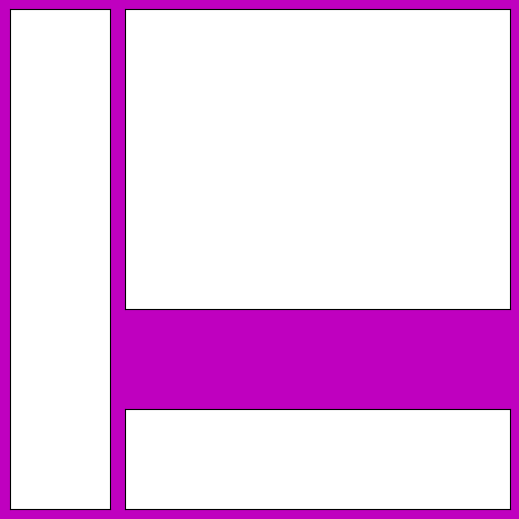

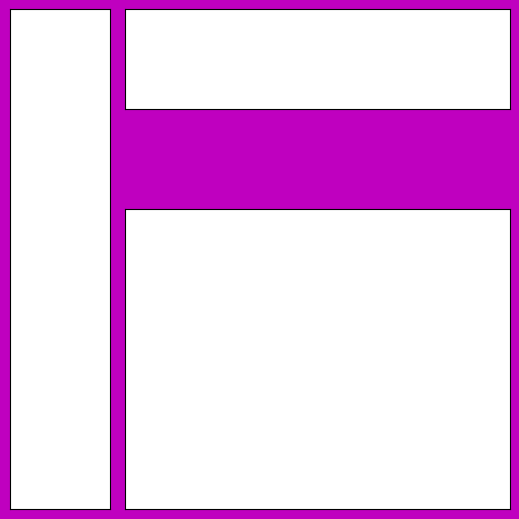

In [5]:
axis_spacing = 0.15
margin = 0.5

for n_iterations in [5, 6]:

    pd = ppd.PlotDescription(6, 6)

    # add three axes
    ax1 = pd.add_axis(0, 0, 1, 1)
    ax2 = pd.add_axis(0, 0, 1, 1)
    ax3 = pd.add_axis(0, 0, 1, 1)

    # align left plot
    pd.add_constraint(None, ax1, 'w', 'w', 'move separation', margin)

    # align to north boundary
    pd.add_constraint(None, [ax1, ax2], 'n', 'n', 'move separation', -margin)

    # set margins
    pd.add_constraint(ax1, [ax2, ax3], 'e', 'w', 'move separation', axis_spacing)

    # resize remaining degrees of freedom to respect desired separations
    pd.add_constraint(None, [ax1, ax3], 's', 's', 'resize separation', margin)
    pd.add_constraint(None, [ax2, ax3], 'e', 'e', 'resize separation', -margin)

    # force two right plots to obey given aspect ratio in heights
    pd.add_constraint(ax2, ax3, 'w', 'w', 'resize duplicate', 1.)

    # notice that this call will *resize* ax2, which means ax3 loses its 
    # duplicate relationship with ax2 and different numbers of iterations
    # lead to different results
    pd.add_constraint(ax3, ax2, 'n', 's', 'resize separation', 1.)

    # apply constraints and make image of layout
    pd.apply_constraints(iterations=n_iterations)
    fig = pd.get_matplotlib_figure(facecolor='m')
    fig.savefig(f'direct-simple-noconv-it{n_iterations:d}.png')
    
    # print plot description
    print(pd)
    print('\nAxes:')
    pprint(pd.axes)
    print('\nConstraints:')
    pprint(pd.constraints)
    print()

# more complicated layout

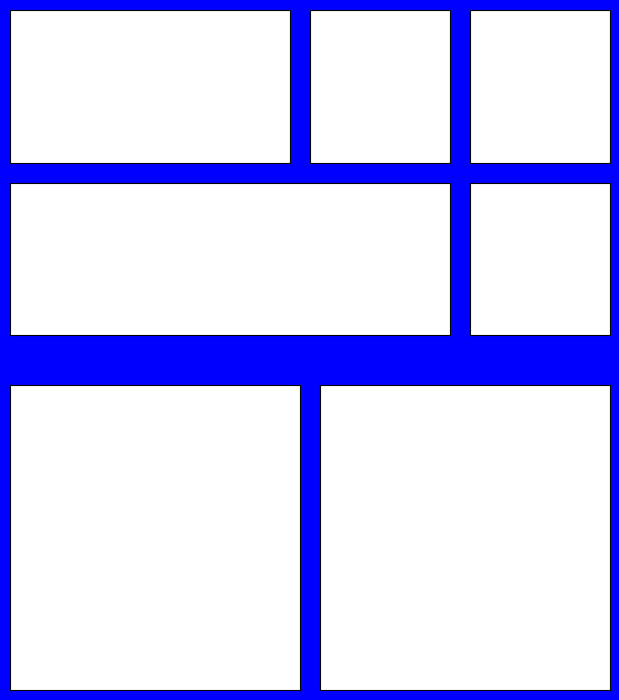

In [6]:
# margins
margin_left = 1.5
margin_bottom = 1.0
margin_right = 0.5
margin_interplot = 0.2
margin_plotgroup = 0.5

# create plot description
pd = ppd.PlotDescription(8, 8)

# axis index row|column
ax11 = pd.add_axis(0, 0, 1, 1)
ax12 = pd.add_axis(0, 0, 1, 1)
ax13 = pd.add_axis(0, 0, 1, 1)

ax21 = pd.add_axis(0, 0, 1, 1)
ax22 = pd.add_axis(0, 0, 1, 1)

ax31 = pd.add_axis(0, 0, 1, 1)
ax32 = pd.add_axis(0, 0, 1, 1)

# set left edge
pd.add_constraint(None, [ax11, ax21, ax31], 'w', 'w', 'move separation', margin_left)

# set up first row
pd.add_constraint(None, [ax11, ax12, ax13], 'n', 'n', 'move separation', -margin_interplot)
pd.add_constraint(ax11, ax12, 'e', 'w', 'move separation', margin_interplot)
pd.add_constraint(ax12, ax13, 'e', 'w', 'move separation', margin_interplot)
pd.add_constraint(None, ax13, 'e', 'e', 'resize separation', -margin_right)
pd.add_constraint(ax11, [ax12, ax13], 'w', 'w', 'duplicate', 1.0)
pd.add_constraint(ax11, [ax12, ax13], 'n', 'n', 'equalize', 0.5)

# set second row
pd.add_constraint(ax11, [ax21, ax22], 's', 'n', 'move separation', -margin_interplot)
pd.add_constraint(ax11, ax21, 'w', 'w', 'move separation', 0)
pd.add_constraint(ax12, ax21, 'e', 'e', 'resize separation', 0)
pd.add_constraint(ax13, ax22, 'w', 'w', 'move separation', 0)
pd.add_constraint(ax13, ax22, 'e', 'e', 'resize separation', 0)
pd.add_constraint(ax21, ax22, 'w', 'w', 'duplicate', 1.0)

# set third row
pd.add_constraint(ax21, [ax31, ax32], 's', 'n', 'move separation', -margin_plotgroup)
pd.add_constraint(ax31, ax32, 'e', 'w', 'move separation', margin_interplot)
pd.add_constraint(None, ax32, 'e', 'e', 'resize separation', -margin_right)
pd.add_constraint(None, [ax31, ax32], 's', 's', 'resize separation', margin_bottom)
pd.add_constraint(ax31, ax32, 'w', 'w', 'duplicate', 1.0)
pd.add_constraint(ax31, ax32, 'n', 'n', 'equalize', 1.0)

# set row heights
pd.add_constraint(ax11, ax21, 'w', 'w', 'equalize', 1.0)
pd.add_constraint(ax11, ax31, 'w', 'w', 'equalize', 2.0)

# apply constraints and make image of layout
pd.apply_constraints()
fig = pd.get_matplotlib_figure(facecolor='b')
fig.savefig('direct-complicated.png')

In [7]:
print(pd)
print('\nAxes:')
pprint(pd.axes)
print('\nConstraints:')
pprint(pd.constraints)

PlotDescription<8x8, 7 axes, 0 text elements>

Axes:
[PlotAxis<axis_0, x0=1.5, y0=6.2749999999999995, w=2.8, h=1.525>,
 PlotAxis<axis_1, x0=4.499999999999999, y0=6.275, w=1.4, h=1.5250000000000001>,
 PlotAxis<axis_2, x0=6.1, y0=6.275, w=1.4, h=1.5250000000000001>,
 PlotAxis<axis_3, x0=1.5, y0=4.549999999999999, w=4.399999999999999, h=1.525>,
 PlotAxis<axis_4, x0=6.099999999999999, y0=4.549999999999999, w=1.4000000000000012, h=1.5250000000000001>,
 PlotAxis<axis_5, x0=1.5, y0=1.0, w=2.9, h=3.05>,
 PlotAxis<axis_6, x0=4.6, y0=1.0, w=2.9, h=3.049999999999999>]

Constraints:
[PlotConstraint<None.w m s:1.5 axis_0.w>,
 PlotConstraint<None.w m s:1.5 axis_3.w>,
 PlotConstraint<None.w m s:1.5 axis_5.w>,
 PlotConstraint<None.n m s:-0.2 axis_0.n>,
 PlotConstraint<None.n m s:-0.2 axis_1.n>,
 PlotConstraint<None.n m s:-0.2 axis_2.n>,
 PlotConstraint<axis_0.e m s:0.2 axis_1.w>,
 PlotConstraint<axis_1.e m s:0.2 axis_2.w>,
 PlotConstraint<None.e r s:-0.5 axis_2.e>,
 PlotConstraint<axis_0.w d:1.0 axis_